<a href="https://colab.research.google.com/github/AkshatTiwari15/ML_AkshatTiwari_15/blob/main/AkshatTiwari_ML_Image_Classification_using_ANN_for_XRAY_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEEP LEARNING ANN MODEL FOR X RAY IMAGES

# Tutorial 4: Covid 19 Prediction using Artificial Neural Networks

Dataset: [Covid 19 Chest X-ray dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)


A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal, and other lung infection dataset is released in stages. In the first release, we have released 219 COVID-19, 1341 normal, and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection), and 1345 Viral Pneumonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.



**1. Mount the Google Drive**

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**2. Move to the place where data resides**

In [27]:
!cd /content/drive/MyDrive/Machine Learning File 15

/bin/bash: line 1: cd: too many arguments


In [28]:
!ls

covid_dataset.zip


**3. Unziping the dataset**

In [29]:
!pip install unzip

In [30]:
!unzip covid_dataset.zip

Archive:  covid_dataset.zip
   creating: covid_dataset/
   creating: covid_dataset/COVID/
  inflating: covid_dataset/COVID/COVID-1.png  
  inflating: covid_dataset/COVID/COVID-10.png  
  inflating: covid_dataset/COVID/COVID-11.png  
  inflating: covid_dataset/COVID/COVID-12.png  
  inflating: covid_dataset/COVID/COVID-13.png  
  inflating: covid_dataset/COVID/COVID-14.png  
  inflating: covid_dataset/COVID/COVID-15.png  
  inflating: covid_dataset/COVID/COVID-16.png  
  inflating: covid_dataset/COVID/COVID-17.png  
  inflating: covid_dataset/COVID/COVID-18.png  
  inflating: covid_dataset/COVID/COVID-19.png  
  inflating: covid_dataset/COVID/COVID-2.png  
  inflating: covid_dataset/COVID/COVID-20.png  
  inflating: covid_dataset/COVID/COVID-21.png  
  inflating: covid_dataset/COVID/COVID-22.png  
  inflating: covid_dataset/COVID/COVID-23.png  
  inflating: covid_dataset/COVID/COVID-24.png  
  inflating: covid_dataset/COVID/COVID-25.png  
  inflating: covid_dataset/COVID/COVID-26.png  


**4. Install split folder python package**

https://pypi.org/project/split-folders/

In [31]:
!pip install split_folders

**5. Splitting the data in training, testing and validation set**

In [32]:
import splitfolders
splitfolders.ratio("covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:01, 75.66 files/s]


**6. Loading the dataset with normalization in batches**

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


**7. Model Building**

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="sigmoid")(x)
x = layers.Dense(64, activation='sigmoid')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │     1,572,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,575,203 (6.01 MB)

 Trainable params: 1,575,203 (6.01 MB)

 Non-trainable params: 0 (0.00 B)

**8. Model Compilation and Training**

In [38]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])  # Use 'accuracy'
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=int(train_generator.samples / train_generator.batch_size),  # Convert to int
      epochs=120,
      validation_data=validation_generator,
      validation_steps=int(validation_generator.samples / validation_generator.batch_size),  # Convert to int
      verbose=1)

Epoch 1/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7530 - loss: 0.8395 - val_accuracy: 0.6250 - val_loss: 0.9632
Epoch 2/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7375 - loss: 0.8216 - val_accuracy: 0.6250 - val_loss: 0.9571
Epoch 3/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6889 - loss: 0.7991 - val_accuracy: 0.5000 - val_loss: 0.9644
Epoch 4/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7025 - loss: 0.8073 - val_accuracy: 0.6250 - val_loss: 0.9369
Epoch 5/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7102 - loss: 0.7702 - val_accuracy: 0.7500 - val_loss: 0.9205
Epoch 6/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7980 - loss: 0.7438 - val_accuracy: 0.7500 - val_loss: 0.9117
Epoch 7/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7451 - loss: 0.7594 - val_accuracy: 0.7500 - val_loss: 0.9111
Epoch 8/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7726 - loss: 0.7850 - val_accuracy: 0.

**9. Model saving**

In [39]:
model.save('covid_classification.h5')

**10. Model loading**

In [46]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [47]:
model.save_weights('covid_classification_weights.weights.h5')

**12. Model weights loading**

In [48]:
model.load_weights('covid_classification_weights.weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [44]:
train_acc = history.history['accuracy'] # Change 'acc' to 'accuracy'
val_acc = history.history['val_accuracy'] # Change 'val_acc' to 'val_accuracy'
train_loss = history.history['loss']
val_loss = history.history['val_loss']

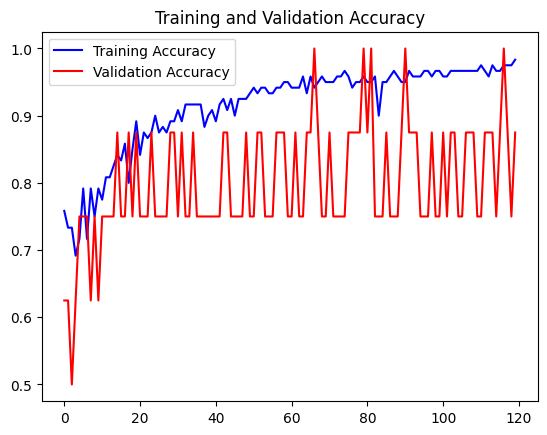

<Figure size 640x480 with 0 Axes>

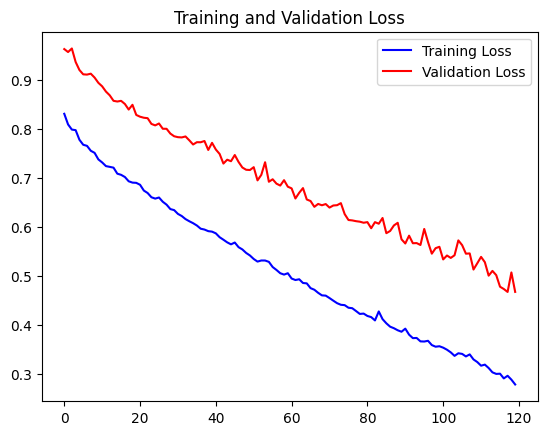

In [45]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [49]:
test_output = model.evaluate(
    test_generator,
    steps=int(test_generator.samples / test_generator.batch_size),  # Convert steps to an integer
    verbose=1
)
print(test_output)
print(model.metrics_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.6250 - loss: 0.8188
[0.8188266754150391, 0.625]
['loss', 'compile_metrics']


References:

1. https://pypi.org/project/split-folders/
2. https://keras.io/